# Holt Linear Or Double  Exponential Smoothing -- DES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data=pd.read_csv(r"C:\Users\Chetan Habib\Desktop\Machine Learning\Sales_Electronic.csv")
data.head()

,Date,Sales
0,01-01-2017,302
1,01-02-2017,332
2,01-03-2017,338
3,01-04-2017,350
4,01-05-2017,380


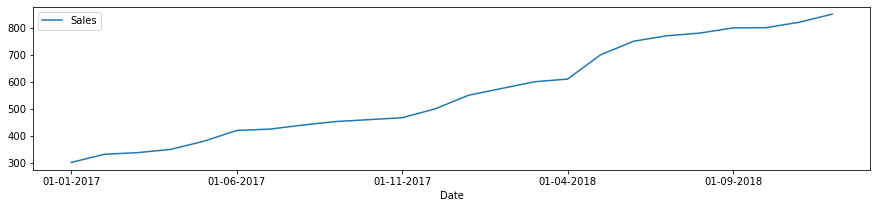

In [3]:
data.plot.line(x = 'Date',y = 'Sales',figsize=(15,3))
plt.show() # pattern = Trend - upward

In [4]:
data2=data.set_index("Date")
data2.head()

,Sales
Date,
01-01-2017,302
01-02-2017,332
01-03-2017,338
01-04-2017,350
01-05-2017,380


#### Manual Model

* Alpha ( Smoothing) = 0.7 & beta ( Trend ) = 0.5
* Initial ( Smoothing) = 302 ( Y1 ) & Initial ( Trend ) = 30 ( y2 - y1)

In [5]:
model2 = Holt(data2,initial_level=302,initial_trend=30,initialization_method='known').fit(
        smoothing_level=0.7,smoothing_trend=0.5,optimized=False,remove_bias=False,method='ls')
model2.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.7,
 'smoothing_trend': 0.5,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 302.0,
 'initial_trend': 30.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [6]:
round(model2.fittedvalues)

Date
01-01-2017    332.0
01-02-2017    330.0
01-03-2017    352.0
01-04-2017    357.0
01-05-2017    365.0
01-06-2017    393.0
01-07-2017    439.0
01-08-2017    452.0
01-09-2017    462.0
01-10-2017    471.0
01-11-2017    475.0
01-12-2017    478.0
01-01-2018    510.0
01-02-2018    568.0
01-03-2018    606.0
01-04-2018    632.0
01-05-2018    640.0
01-06-2018    726.0
01-07-2018    795.0
01-08-2018    821.0
01-09-2018    822.0
01-10-2018    827.0
01-11-2018    820.0
01-12-2018    832.0
dtype: float64

In [7]:
df = pd.DataFrame(
    np.c_[data.Sales, model2.level, model2.trend, model2.fittedvalues],
    columns=["Actual","Level","Trend","Forecast"])
df.head()

,Actual,Level,Trend,Forecast
0,302.0,311.000000,19.500000,332.000000
1,332.0,331.550000,20.025000,330.500000
2,338.0,342.072500,15.273750,351.575000
3,350.0,352.203875,12.702562,357.346250
4,380.0,375.471931,17.985309,364.906437


#### Forecast Value & Plot 

In [8]:
Forecast2 = round(model2.forecast(6),0)
Forecast2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


24    863.0
25    881.0
26    899.0
27    917.0
28    936.0
29    954.0
dtype: float64

<AxesSubplot:xlabel='Date'>

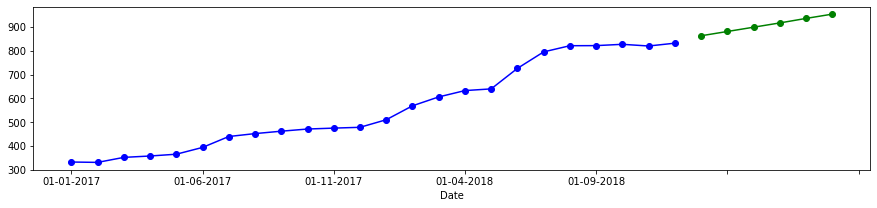

In [9]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [10]:
data2["Forecast"]=model2.fittedvalues
data2.head()

,Sales,Forecast
Date,,
01-01-2017,302,332.000000
01-02-2017,332,330.500000
01-03-2017,338,351.575000
01-04-2017,350,357.346250
01-05-2017,380,364.906437


#### Accuracy of Model

In [11]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Sales - data2.Forecast)/np.abs(data2.Sales))*100
mean_absolute_percentage_error

3.5386545080375953

# Auto model 

In [13]:
data=pd.read_csv(r"C:\Users\Chetan Habib\Desktop\Machine Learning\Sales_Electronic.csv")
data.head()

,Date,Sales
0,01-01-2017,302
1,01-02-2017,332
2,01-03-2017,338
3,01-04-2017,350
4,01-05-2017,380


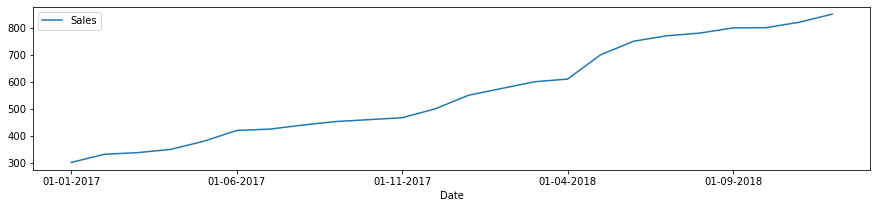

In [14]:
data.plot.line(x = 'Date',y = 'Sales',figsize=(15,3))
plt.show()

In [15]:
data2=data.set_index("Date")
data2.head()

,Sales
Date,
01-01-2017,302
01-02-2017,332
01-03-2017,338
01-04-2017,350
01-05-2017,380


In [16]:
fit_auto= Holt(data2).fit(optimized=True) # lets software decide 
fit_auto.params

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 278.12475070256437,
 'initial_trend': 23.82641338337671,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [17]:
data2["Forecast"]=fit_auto.fittedvalues
data2.head()

,Sales,Forecast
Date,,
01-01-2017,302,301.951164
01-02-2017,332,325.826413
01-03-2017,338,355.826413
01-04-2017,350,361.826414
01-05-2017,380,373.826414


#### Accuracy of Model

In [18]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Sales - data2.Forecast)/np.abs(data2.Sales))*100
mean_absolute_percentage_error

2.550576056100998

#### Forecast Value & Plot 

In [19]:
Forecast2 = round(fit_auto.forecast(6),0)
Forecast2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


24    874.0
25    898.0
26    921.0
27    945.0
28    969.0
29    993.0
dtype: float64

<AxesSubplot:xlabel='Date'>

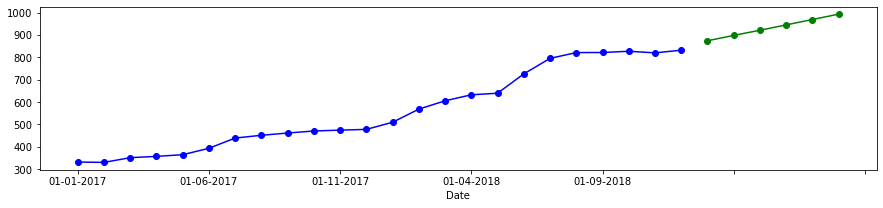

In [20]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

#### Auto model is Best Model 